In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow import keras

%matplotlib inline

In [2]:
series = pd.read_csv("../data/processed/EURUSD_processed.csv")
series["Close"]

0        0.000958
1        0.000100
2       -0.000133
3       -0.000025
4       -0.000083
           ...   
37357    0.000090
37358    0.000066
37359    0.000016
37360   -0.000057
37361    0.000090
Name: Close, Length: 37362, dtype: float64

In [3]:
series.shape

(37362, 24)

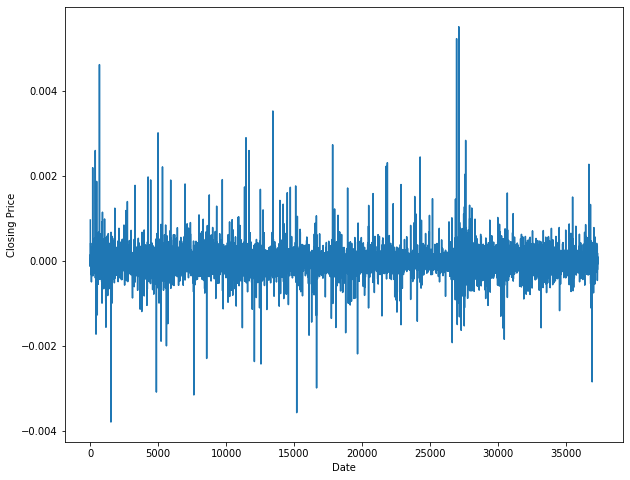

In [4]:
plt.figure(figsize=(10, 8))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(series.index[:], series["Close"][:])

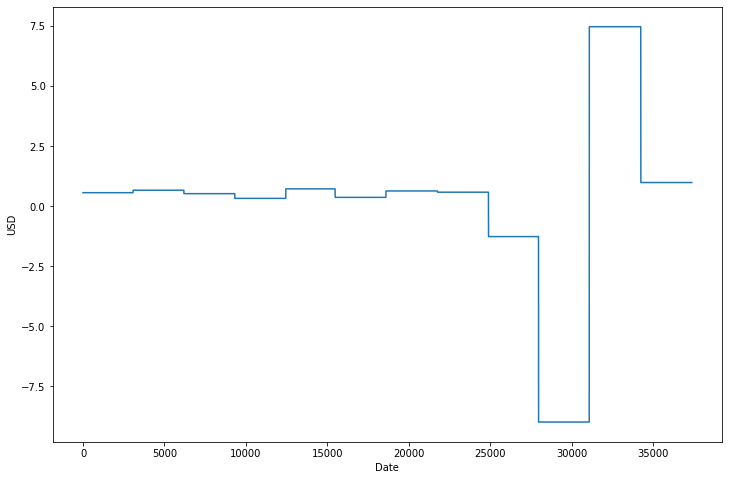

In [5]:
plt.figure(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("USD")
plt.plot(series.index, series["USD_GDP"])

In [6]:
batch_size = 16
series = series[series.shape[0] % batch_size:]
series = series.drop('Time', axis=1)
series = series[{'Close', 'EMA_10', 'EMA_100', 'EUR Interest Rate', 'USD Interest Rate', 'A/D Index'}]
#series = series.drop(['Volume', 'USD_PPI', 'EUR_PPI', "EUR News Sentiment", "USD News Sentiment"], axis=1)
series

,USD Interest Rate,EMA_10,EMA_100,EUR Interest Rate,Close,A/D Index
2,2.58,1.307114e-06,1.394085e-07,1.0339,-0.000133,-15943.926503
3,2.58,1.300039e-06,1.466399e-07,1.0339,-0.000025,-10116.935231
4,2.58,1.293550e-06,1.444050e-07,1.0339,-0.000083,-4132.010774
5,2.58,1.323349e-06,1.518127e-07,1.0339,0.000000,1986.349044
6,2.58,1.359583e-06,1.563394e-07,1.0339,0.000100,7921.692500
...,...,...,...,...,...,...
37357,0.93,7.632054e-06,1.239241e-05,-0.0913,0.000090,64927.456120
37358,0.93,4.074039e-05,-2.018817e-06,-0.0913,0.000066,61014.484780
37359,0.93,-1.727098e-05,7.893409e-06,-0.0913,0.000016,55243.856680
37360,0.93,-1.784520e-07,-4.327320e-06,-0.0913,-0.000057,49734.711960


In [7]:
#features.describe().T

In [8]:
"""featureScaler = MinMaxScaler()
closeScaler = MinMaxScaler()
features = pd.DataFrame(featureScaler.fit_transform(features),
                       columns=features.columns,
                       index=features.index)
target = pd.DataFrame(closeScaler.fit_transform(target),
                     columns=target.columns,
                     index=target.index)"""

'featureScaler = MinMaxScaler()\ncloseScaler = MinMaxScaler()\nfeatures = pd.DataFrame(featureScaler.fit_transform(features),\n                       columns=features.columns,\n                       index=features.index)\ntarget = pd.DataFrame(closeScaler.fit_transform(target),\n                     columns=target.columns,\n                     index=target.index)'

In [9]:
#processed = pd.concat([features, target], axis=1, sort=False)
#processed

In [10]:
import math

def create_split(df, pct_train, pct_val):
    length = df.shape[0]
    temp_train_size = find_batch_gcd(math.floor(pct_train * length))
    test_size = length - temp_train_size
    train_size = find_batch_gcd(math.floor((1 - pct_val) * temp_train_size))
    val_size = temp_train_size - train_size
    df_train = series[:- val_size - test_size]
    df_val = series[- val_size - test_size - window_size:- test_size]
    df_test = series[- test_size - window_size:]
    return df_train, df_val, df_test
    
def find_batch_gcd(length):
    while length % batch_size != 0:
        length -= 1
    return length

In [11]:
"""train_size = 934 * batch_size
test_size = 233 * batch_size
train_size = 841 * batch_size
val_size = 93 * batch_size
window_size = 8 * batch_size
df_train = series[:- val_size - test_size]
df_val = series[- val_size - test_size - window_size:- test_size]
df_test = series[- test_size - window_size:]
print(f'df_train.shape {df_train.shape}, df_validation.shape {df_val.shape}, df_test.shape {df_test.shape}')"""
window_size = 16 * batch_size
df_train, df_val, df_test = create_split(series, 0.8, 0.1)
print(f'df_train.shape {df_train.shape}, df_validation.shape {df_val.shape}, df_test.shape {df_test.shape}')

df_train.shape (26896, 6), df_validation.shape (3248, 6), df_test.shape (7728, 6)


In [12]:
df_val

,USD Interest Rate,EMA_10,EMA_100,EUR Interest Rate,Close,A/D Index
26642,1.50,0.000050,1.195250e-05,0.1365,0.000563,-132792.392632
26643,1.50,-0.000028,-6.685246e-06,0.1365,-0.000378,-149048.057119
26644,1.50,0.000062,2.552436e-06,0.1365,0.000157,-149436.198642
26645,1.50,-0.000052,-2.122528e-06,0.1365,-0.000157,-142398.450258
26646,1.50,-0.000028,-9.292345e-07,0.1365,-0.000046,-133514.920586
...,...,...,...,...,...,...
29885,0.67,0.000040,4.842693e-06,0.4796,0.000055,73679.118582
29886,0.67,-0.000010,2.843056e-06,0.4796,0.000201,38206.386112
29887,0.67,0.000005,6.049500e-06,0.4796,0.000155,38386.769678
29888,0.67,-0.000034,3.364584e-06,0.4796,0.000009,27056.859155


In [13]:
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train),
                       columns=df_train.columns,
                       index=df_train.index)
df_val = pd.DataFrame(scaler.transform(df_val),
                     columns=df_val.columns,
                     index=df_val.index)
df_test = pd.DataFrame(scaler.transform(df_test),
                      columns=df_test.columns,
                      index=df_test.index)

In [14]:
df_train

,USD Interest Rate,EMA_10,EMA_100,EUR Interest Rate,Close,A/D Index
2,0.750000,0.576272,0.508953,0.651298,0.435597,0.462652
3,0.750000,0.576269,0.509008,0.651298,0.448460,0.474764
4,0.750000,0.576265,0.508991,0.651298,0.441531,0.487204
5,0.750000,0.576280,0.509046,0.651298,0.451429,0.499921
6,0.750000,0.576298,0.509080,0.651298,0.463299,0.512258
...,...,...,...,...,...,...
26893,0.276316,0.584115,0.539289,0.056836,0.458966,0.478894
26894,0.276316,0.599420,0.461810,0.056836,0.477272,0.489465
26895,0.276316,0.569478,0.508428,0.056836,0.451429,0.496762
26896,0.000000,0.707699,0.716656,0.214759,0.623808,0.504232


In [15]:
def create_dataset(df, window_size):
    X, y = [], []
    for i in range(len(df) - window_size):
        v = df.iloc[i:(i + window_size)].values
        X.append(v)
        y.append(df["Close"].iloc[i + window_size])
    return np.array(X), np.array(y)

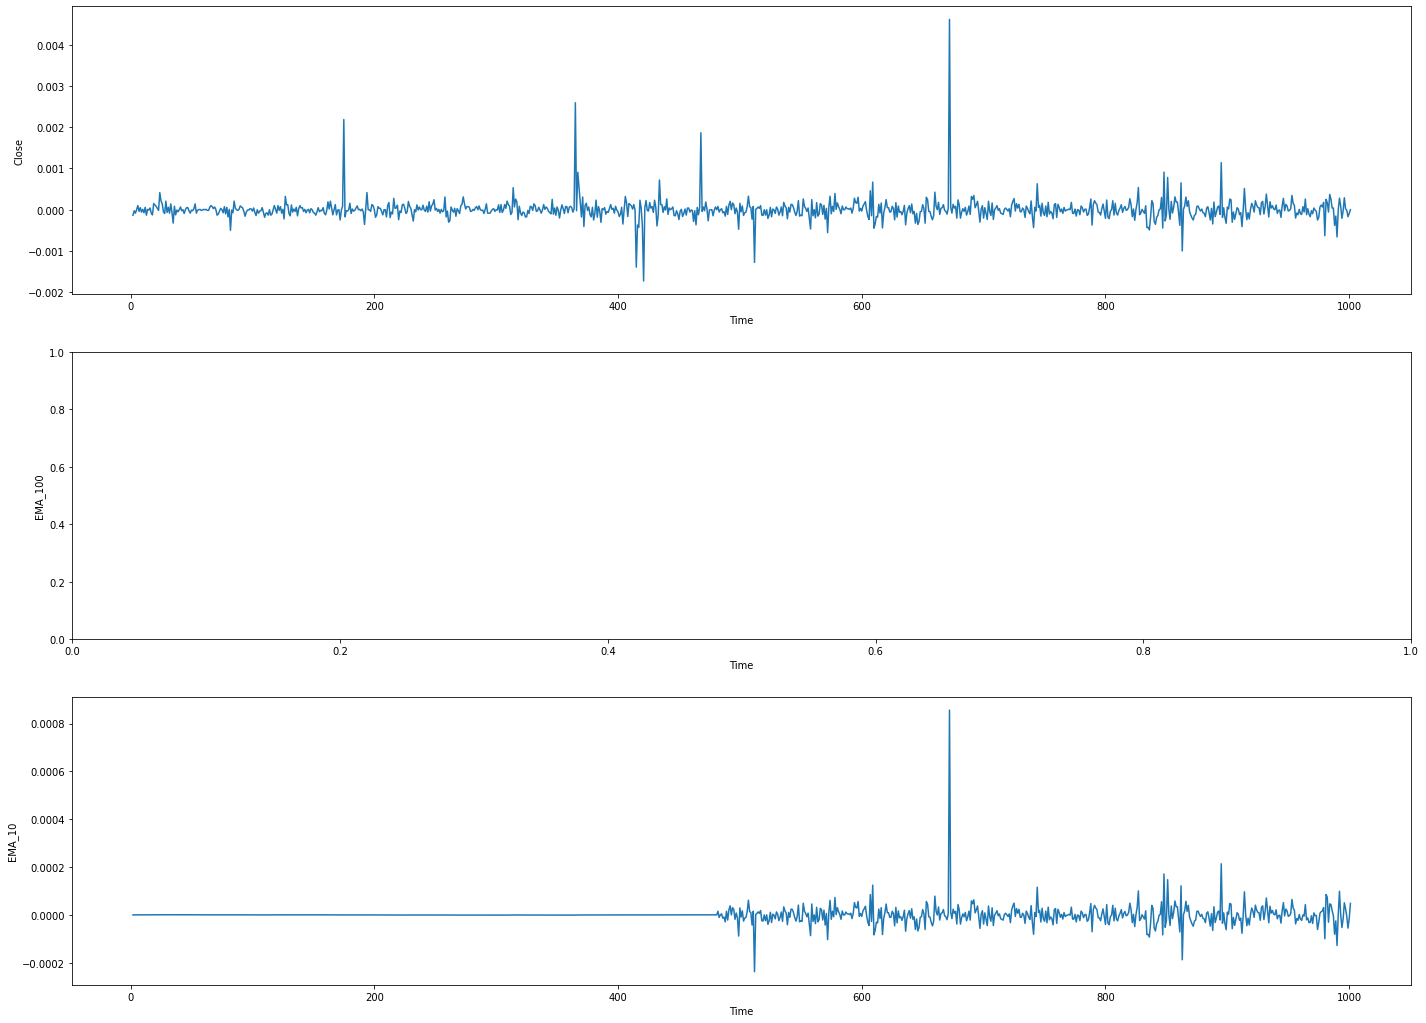

In [16]:
fig = plt.figure(figsize=(24, 18))
ax1, ax2, ax3 = fig.subplots(3)
ax1.set(xlabel='Time', ylabel='Close')
ax2.set(xlabel='Time', ylabel='EMA_100')
ax3.set(xlabel='Time', ylabel='EMA_10')
ax1.plot(series['Close'][:1000])
#ax2.plot(series['EMA_100'][:1000])
ax3.plot(series['EMA_10'][:1000])

In [17]:
X_train, y_train = create_dataset(df_train, window_size)
X_val, y_val = create_dataset(df_val, window_size)
X_test, y_test = create_dataset(df_test, window_size)

In [18]:
X_train.shape

(26640, 256, 6)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss="mse", optimizer='Adam')

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=batch_size, shuffle=False)

Epoch 1/10
1665/1665 [==============================] - 138s 83ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 2/10
 148/1665 [=>............................] - ETA: 1:55 - loss: 0.0023

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.subplots(1)
ax1.set_title('Model Loss')
ax1.set(xlabel='Epoch', ylabel='Loss')
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.subplots(1)
ax1.set_title('Predicted Closing Price')
ax1.set(xlabel='Time', ylabel='Close')
ax1.plot(y_test, label='Actual')
ax1.plot(y_pred, label='Prediction')
ax1.legend()

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.subplots(1)
ax1.set_title('Predicted Closing Price')
ax1.set(xlabel='Time', ylabel='Close')
ax1.plot(y_pred[7400:], label='Prediction')
ax1.plot(y_test[7400:], label='Actual')
ax1.legend()

In [ ]:
fig = plt.figure(figsize=(16, 10))
ax1, ax2 = fig.subplots(2)
ax1.set_title('Closing Price')
ax2.set_title('Predicted Closing Price')
ax2.plot(y_pred[6000:])
ax1.plot(y_test[6000:])

In [ ]:
"""train_size = int(len(processed) * 0.9)
test_size = len(processed) - train_size
train, test = processed.iloc[0:train_size], processed.iloc[train_size:len(processed)]
print(len(train), len(test))"""

In [ ]:
"""def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)"""

In [ ]:
"""time_steps = 480

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

print(X_train, y_train)"""

In [ ]:
"""model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')"""

In [ ]:
"""history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)"""

In [ ]:
"""plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])"""

In [ ]:
"""plt.figure(figsize=(16, 10))
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)"""

In [ ]:
#plt.plot(y_pred)

In [ ]:
#plt.plot(y_test)

In [ ]:
#df = pd.DataFrame()

In [ ]:
#df["Pred Scaled"] = np.pad(y_pred.reshape(y_pred.shape[0]), (time_steps, 0), mode='constant', constant_values=np.nan)
#df["Pred Scaled"]

In [ ]:
#df['Pred Returns'] = closeScaler.inverse_transform(df[['Pred Scaled']].values)
#df["Pred Returns"]

In [ ]:
#target

In [ ]:
#df['Pred'] = target["Close"].mul(np.exp(df['Pred Returns'].shift(-1))).shift(1)

In [ ]:
#plt.plot(df["Pred"])